In [45]:
import numpy as np
import matplotlib.pyplot as plt


def run(h,d,rescale):
    multiplier = d ** 0.5 if rescale else 1.
    # Define the alpha and beta functions
    def alpha_t(t):
        return (1 - t )*multiplier

    def beta_t(t):
        return t

    # Define the derivatives of alpha and beta
    def alpha_dot_t(t):
        return - multiplier

    def beta_dot_t(t):
        return 1.

    # Define the flow function b_t(m)
    def b_t(m, t):
        alpha = alpha_t(t)
        beta = beta_t(t)
        alpha_dot = alpha_dot_t(t)
        beta_dot = beta_dot_t(t)

        term1 = (alpha * alpha_dot + beta * beta_dot) / (alpha**2 + beta**2) * m
        term2 = (alpha * (alpha * beta_dot - alpha_dot * beta)) / (alpha**2 + beta**2)
        term3 = np.tanh(h + (d * beta) / (alpha**2 + beta**2) * m)

        return term1 + term2 * term3

    # Create a grid of points for m and t
    m_values = np.linspace(-3, 3, 100)
    t_values = np.linspace(0, 1, 100)
    T,M = np.meshgrid(t_values, m_values)

    # Compute the flow field
    U = np.ones_like(M)
    V = b_t(M, T)
    return T,M,U,V

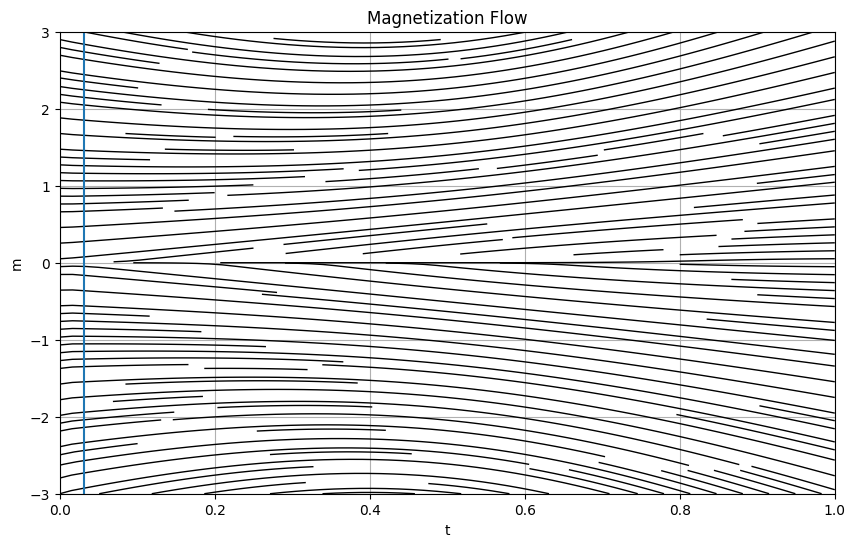

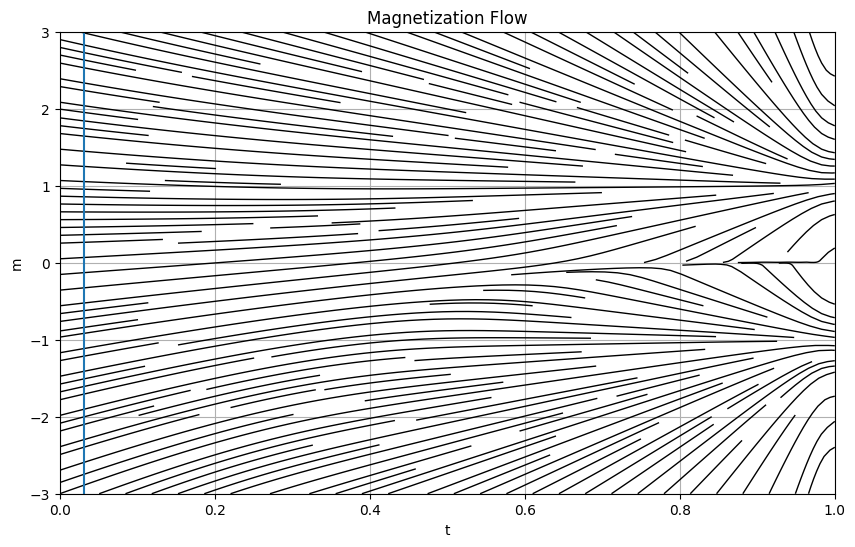

In [46]:
h = 0.693
d = 1e3

T,M,U,V = run(h,d,False)
# Create the streamplot
plt.figure(figsize=(10, 6))
plt.streamplot(T, M, U, V, density=2, linewidth=1, arrowsize=0, color='black')
plt.xlabel('t')
plt.ylabel('m')
plt.axvline(1/d**0.5)
plt.title('Magnetization Flow')
plt.grid(True)
plt.show()
T,M,U,V = run(h,d,True)
# Create the streamplot
plt.figure(figsize=(10, 6))
plt.streamplot(T, M, U, V, density=2, linewidth=1, arrowsize=0, color='black')
plt.xlabel('t')
plt.ylabel('m')
plt.axvline(1/d**0.5)
plt.title('Magnetization Flow')
plt.grid(True)
plt.show()